# 📊 Entrainement des modèles et Prédiction des prix des voitures 

In [64]:
# Librairies


import os
import joblib
import pandas as pd
import numpy as np  
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from pathlib import Path 

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from scipy.optimize import minimize_scalar
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set_theme(style="whitegrid", palette="muted")
from matplotlib import rcParams
palette = sns.color_palette("pastel")

import warnings
warnings.filterwarnings("ignore")

**Les données**

In [68]:
BASE_DIR = Path().resolve()
DATA_DIR = BASE_DIR / 'Donnees'

#print(f"BASE_DIR: {BASE_DIR}")
#print(f"DATA_DIR: {DATA_DIR}")


df = pd.read_csv(DATA_DIR / 'vehicules.csv')
df.head(4)

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,audi,€ 74 999,Boîte automatique,55 TFSI Quattro Tiptronic S-Line INDIVIDUAL!,34 000 km,Essence,250 kW (340 CH),121,Kristof D'herde • BE-9300 Aalst,Audi Q855 TFSI Quattro Tiptronic S-Line INDIVI...,01/2021
1,audi,€ 118 900,Boîte automatique,60 Hybride 49 CO2 BlackPack B&O 23' Leather,10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybride 49 CO2 BlackPack B&O 23' Lea...,01/2024
2,audi,€ 118 900,Boîte automatique,60 Hybr 49gr Sline BlackPack B&O Leather 23',10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybr 49gr Sline BlackPack B&O Leathe...,01/2024
3,audi,€ 59 995,Boîte automatique,50 TDi S-Line Quattro Tiptronic,95 702 km,Diesel,210 kW (286 CH),75,Mhr Jannick Lazoore • BE-8620 Nieuwpoort,Audi Q850 TDi S-Line Quattro Tiptronic,04/2019


### **Preprocessing des données**

In [69]:
from cleaning_data.cleaning import clean_preprocess
df = clean_preprocess(df)
df.head(4)

,prix,kilométrage,puissance,évaluations,modèle_Unknown,modèle_audi,modèle_bentley,modèle_ferrari,modèle_fiat,modèle_ford,...,modèle_renault,modèle_toyota,modèle_volkswagen,carburant_Diesel,carburant_Electrique,carburant_Electrique/Diesel,carburant_Electrique/Essence,carburant_Essence,transmission_Boîte automatique,transmission_Boîte manuelle
0,74999.0,34000.0,340.0,121.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,59995.0,95702.0,286.0,75.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [10]:
#df.info()

dtypes: bool(20), float64(4)

**Variables numériques (4)**
- prix : float64
- kilométrage : float64
- puissance : float64
- évaluations : float64

**Variables catégorielles encodées(20)**
- Modèles (13 booléennes) :
modèle_audi, modèle_bentley, ..., modèle_volkswagen, etc.

modèle_Unknown : sûrement les véhicules où le modèle n’était pas identifié.

- Carburants (5 booléennes) :
Diesel, Essence, Electrique, ou des combinaisons (Electric/Essence, etc.)

- Transmission (2 booléennes) :
Boîte automatique / manuelle


In [70]:
print(f"la dimension de notre table  est : {df.shape}")

la dimension de notre table  est : (2670, 24)


In [71]:
print(f"Le nombre de valeurs manquantes : {df.isnull().sum().sum()}")

Le nombre de valeurs manquantes : 0


### I- **Entrainement, tuning et optimisation des paramètres des modèles**

In [72]:
X = df.drop('prix', axis=1)
y = df['prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2136, 23)
y_train shape: (2136,)
X_test shape: (534, 23)
y_test shape: (534,)


In [73]:
from machine_learning.machine_learn import train_best_models

#ridge_model, knr_model, svr_model, rfr_model, gbr_model, mlp_model = train_best_models(X_train, y_train)


les meilleurs paramètre de chaque modèles  

In [85]:
from machine_learning.train_models_utils import load_all_models, get_all_best_params

In [86]:
loaded_models = load_all_models()
best_params = get_all_best_params(loaded_models)

In [87]:
# Afficher les meilleurs paramètres de chaque modèle
for name, params in best_params.items():
    print(f"\n🔧 {name.upper()} - Best params:")
    for k, v in params.items():
        print(f"  {k} : {v}")


🔧 GRADIENT_BOOSTING - Best params:
  entrainement__learning_rate : 0.5
  entrainement__n_estimators : 400
  imputation__strategy : mean

🔧 KNEIGHBORS - Best params:
  entrainement__n_neighbors : 2
  imputation__strategy : mean

🔧 MLP - Best params:
  entrainement__hidden_layer_sizes : (50, 50)
  entrainement__max_iter : 1000
  imputation__strategy : median

🔧 RANDOM_FOREST - Best params:
  entrainement__max_features : None
  entrainement__n_estimators : 180
  imputation__strategy : mean

🔧 RIDGE - Best params:
  entrainement__alpha : 2
  imputation__strategy : mean

🔧 SVR - Best params:
  entrainement__C : 65536.0
  entrainement__epsilon : 0.7
  imputation__strategy : mean


### II- Le réentraînement des modèles avec les meilleurs parametres

In [88]:
# extraction de meilleur parametre de chaque model -> dict

from machine_learning.train_models_utils import extract_best_params_dict 
models_dict = extract_best_params_dict(loaded_models)

# Afficher les meilleurs paramètres de chaque modèle
models_dict

{'gradient_boosting': {'model': sklearn.ensemble._gb.GradientBoostingRegressor,
  'best_params': {'entrainement__learning_rate': 0.5,
   'entrainement__n_estimators': 400,
   'imputation__strategy': 'mean'}},
 'kneighbors': {'model': sklearn.neighbors._regression.KNeighborsRegressor,
  'best_params': {'entrainement__n_neighbors': 2,
   'imputation__strategy': 'mean'}},
 'mlp': {'model': sklearn.neural_network._multilayer_perceptron.MLPRegressor,
  'best_params': {'entrainement__hidden_layer_sizes': (50, 50),
   'entrainement__max_iter': 1000,
   'imputation__strategy': 'median'}},
 'random_forest': {'model': sklearn.ensemble._forest.RandomForestRegressor,
  'best_params': {'entrainement__max_features': None,
   'entrainement__n_estimators': 180,
   'imputation__strategy': 'mean'}},
 'ridge': {'model': sklearn.linear_model._ridge.Ridge,
  'best_params': {'entrainement__alpha': 2, 'imputation__strategy': 'mean'}},
 'svr': {'model': sklearn.svm._classes.SVR,
  'best_params': {'entrainemen

**training** 

In [89]:
from machine_learning.train_models_utils import train_models_with_best_params

# Entraîner les modèles avec les meilleurs paramètres
trained_models = train_models_with_best_params(models_dict, X_train, y_train)

In [90]:
trained_models

{'gradient_boosting': Pipeline(steps=[('imputation', SimpleImputer()),
                 ('entrainement',
                  GradientBoostingRegressor(learning_rate=0.5,
                                            n_estimators=400))]),
 'kneighbors': Pipeline(steps=[('imputation', SimpleImputer()),
                 ('entrainement', KNeighborsRegressor(n_neighbors=2))]),
 'mlp': Pipeline(steps=[('imputation', SimpleImputer(strategy='median')),
                 ('entrainement',
                  MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000))]),
 'random_forest': Pipeline(steps=[('imputation', SimpleImputer()),
                 ('entrainement',
                  RandomForestRegressor(max_features=None, n_estimators=180))]),
 'ridge': Pipeline(steps=[('imputation', SimpleImputer()),
                 ('entrainement', Ridge(alpha=2))]),
 'svr': Pipeline(steps=[('imputation', SimpleImputer()),
                 ('entrainement', SVR(C=np.float64(65536.0), epsilon=0.7))])}

### **Evaluation des modèles** 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Dictionnaire pour stocker les résultats
results = []

# Évaluation de chaque modèle
for name, model in trained_models.items():
    # Prédictions
    y_pred = model.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Stockage
    results.append({
        "Modèle": name.upper(),
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Résultats sous forme de DataFrame
df_results = pd.DataFrame(results).sort_values(by="RMSE")
print(df_results)

#🔽 Sauvegarde en CSV
df_results.to_csv("resultats_modeles.csv", index=False)
print("📁 Fichier 'resultats_modeles.csv' sauvegardé avec succès.")


              Modèle          RMSE           MAE        R²
1         KNEIGHBORS   2555.058506    156.367041  0.999453
0  GRADIENT_BOOSTING   2555.073206    163.086793  0.999453
3      RANDOM_FOREST   2562.730116    198.515564  0.999450
2                MLP  44384.112114  26930.720673  0.835062
4              RIDGE  51911.117909  33430.086921  0.774375
5                SVR  94909.890679  65441.245308  0.245796


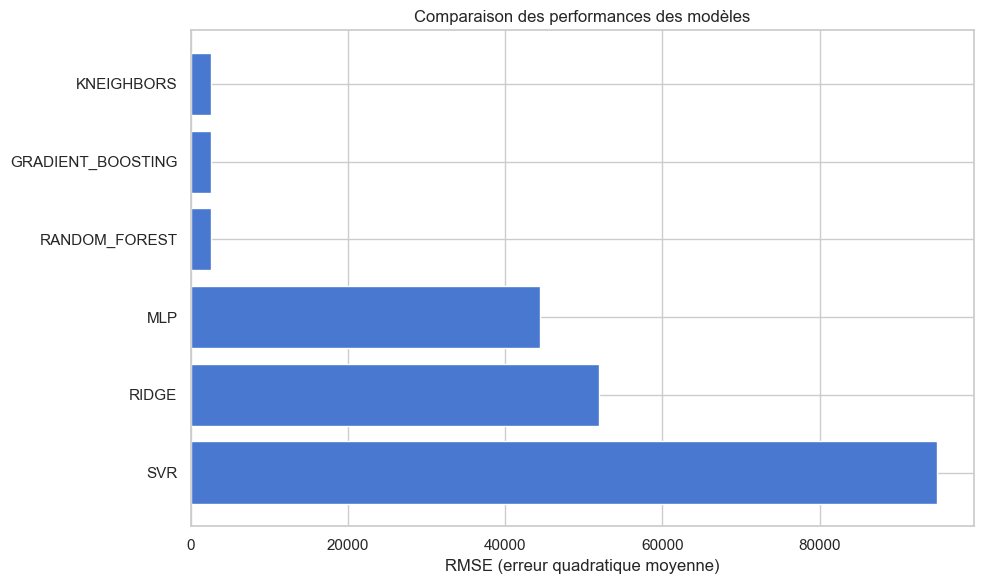

In [96]:
# 📊 Visualisation des RMSE
plt.figure(figsize=(10, 6))
plt.barh(df_results["Modèle"], df_results["RMSE"])
plt.xlabel("RMSE (erreur quadratique moyenne)")
plt.title("Comparaison des performances des modèles")
plt.gca().invert_yaxis()  # Pour que le meilleur modèle soit en haut
plt.tight_layout()
plt.show()

**interprétation** :

✅ RMSE (Root Mean Squared Error)
Mesure l'erreur moyenne pondérée.

Plus c’est petit, mieux c’est.

Ici : les 3 premiers modèles(`kneighbors, gradient_boosting, random_forest`) sont très proches (~2555) → performances très similaires.

`mlp`  Moins bon : erreur élevée malgré un R² décent 

`RIDGE` : Performances moyennes, erreurs élevées 

`SVR` : auvais modèle ici : grosse erreur et R² très faible



**KNN a la meilleure MAE, donc très précis.**


#### Sauvegarde du meilleur modèle KNN

In [98]:
import joblib

# Récupérer le pipeline du modèle KNN (clé en minuscules)
best_model = trained_models["kneighbors"]

# Sauvegarde avec joblib
joblib.dump(best_model, "meilleur_modele_knn.pkl")

print("✅ Modèle KNEIGHBORS sauvegardé sous 'meilleur_modele_knn.pkl'")


✅ Modèle KNEIGHBORS sauvegardé sous 'meilleur_modele_knn.pkl'


In [102]:
modele_knn = joblib.load("meilleur_modele_knn.pkl")

# Exemple de prédiction
# y_pred = modele_knn.predict(X_test)

In [99]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# On prend le modèle entraîné (pipeline) KNN
knn_model = trained_models["kneighbors"]

# Importance par permutation sur le jeu de test
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Résultat dans un DataFrame
importances_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance Moyenne": result.importances_mean,
    "Écart-Type": result.importances_std
}).sort_values(by="Importance Moyenne", ascending=False)

print(importances_df)


                           Feature  Importance Moyenne  Écart-Type
0                      kilométrage            1.190091    0.081428
1                        puissance            0.939193    0.089945
2                      évaluations            0.056082    0.015088
3                   modèle_Unknown            0.000000    0.000000
4                      modèle_audi            0.000000    0.000000
5                   modèle_bentley            0.000000    0.000000
6                   modèle_ferrari            0.000000    0.000000
7                      modèle_fiat            0.000000    0.000000
8                      modèle_ford            0.000000    0.000000
9               modèle_lamborghini            0.000000    0.000000
10               modèle_land-rover            0.000000    0.000000
11            modèle_mercedes-benz            0.000000    0.000000
12                  modèle_porsche            0.000000    0.000000
13                  modèle_renault            0.000000    0.00

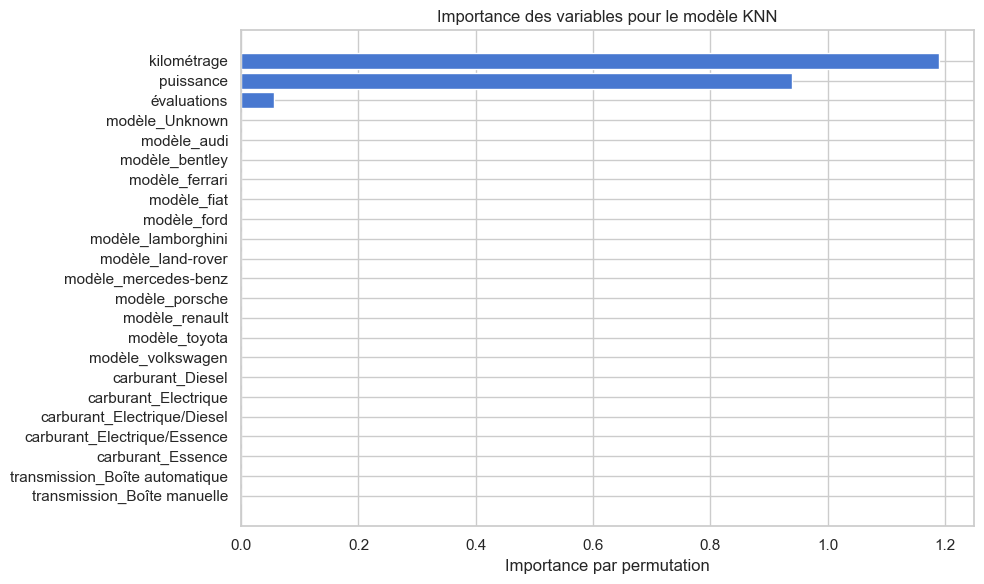

In [100]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df["Feature"], importances_df["Importance Moyenne"])
plt.xlabel("Importance par permutation")
plt.title("Importance des variables pour le modèle KNN")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Prédiction avec KNN

In [115]:
from machine_learning.price_prediction import predict_price 

voiture_exemple = {
    'modèle': 'modèle_volkswagen',
    'kilométrage': 119080,
    'puissance': 258,
    'transmission_Boîte automatique': True
}

prix_predit = predict_price(modele_knn, voiture_exemple, X_test.columns)
print("💰 Prix prédit :", round(prix_predit, 2))


💰 Prix prédit : 33500.0


In [110]:
df

,prix,kilométrage,puissance,évaluations,modèle_Unknown,modèle_audi,modèle_bentley,modèle_ferrari,modèle_fiat,modèle_ford,...,modèle_renault,modèle_toyota,modèle_volkswagen,carburant_Diesel,carburant_Electrique,carburant_Electrique/Diesel,carburant_Electrique/Essence,carburant_Essence,transmission_Boîte automatique,transmission_Boîte manuelle
0,74999.0,34000.0,340.0,121.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,59995.0,95702.0,286.0,75.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,76900.0,19000.0,286.0,252.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,69500.0,10000.0,200.0,78.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2676,33500.0,119080.0,258.0,25.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2677,29990.0,46900.0,150.0,70.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2678,189000.0,5000.0,551.0,17.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [120]:
import pandas as pd
import numpy as np

def analyser_prix_prediction(modele, voiture_exemple: dict, colonnes_reference, df: pd.DataFrame):
    """
    Prédit le prix d'une voiture et le compare aux voitures similaires du dataset df.
    
    Paramètres :
        modele : modèle pipeline entraîné (ex: KNN)
        voiture_exemple : dictionnaire avec les caractéristiques de la voiture
        colonnes_reference : colonnes du jeu d'entraînement (ex: X_train.columns)
        df : ton DataFrame contenant les données encodées + la colonne 'prix'
    """
    # 1. Créer le DataFrame pour la voiture
    df_voiture = pd.DataFrame([voiture_exemple])

    # 2. Compléter les colonnes manquantes
    cols_manquantes = [col for col in colonnes_reference if col not in df_voiture.columns]
    df_manquantes = pd.DataFrame(0, index=[0], columns=cols_manquantes)

    df_voiture_encoded = pd.concat([df_voiture, df_manquantes], axis=1)
    df_voiture_encoded = df_voiture_encoded.reindex(columns=colonnes_reference, fill_value=0)

    # 3. Prédire le prix
    prix_predit = modele.predict(df_voiture_encoded)[0]
    print(f"💰 Prix prédit : {round(prix_predit, 2)} €")

    # 4. Extraire les critères
    modele_col = voiture_exemple.get("modèle", None)
    kilometrage = voiture_exemple.get("kilométrage", None)
    puissance = voiture_exemple.get("puissance", None)

    if modele_col and kilometrage and puissance:
        km_min = kilometrage * 0.85
        km_max = kilometrage * 1.15
        puiss_min = puissance * 0.9
        puiss_max = puissance * 1.1

        # 5. Filtrer les voitures similaires dans df
        voitures_similaires = df[
            (df[modele_col] == 1) &
            (df['kilométrage'].between(km_min, km_max)) &
            (df['puissance'].between(puiss_min, puiss_max))
        ]

        if not voitures_similaires.empty:
            prix_moyen = voitures_similaires['prix'].mean()
            prix_min = voitures_similaires['prix'].min()
            prix_max = voitures_similaires['prix'].max()

            print(f"\n📊 Voitures similaires trouvées : {len(voitures_similaires)}")
            print(f"📌 Prix moyen observé : {round(prix_moyen, 2)} €")
            print(f"🔻 Prix minimum : {round(prix_min, 2)} €")
            print(f"🔺 Prix maximum : {round(prix_max, 2)} €")

            if prix_predit < prix_moyen:
                print("✅ Le prix prédit est **inférieur** au marché → bonne affaire.")
            elif prix_predit > prix_moyen:
                print("⚠️ Le prix prédit est **supérieur** au marché → à surveiller.")
            else:
                print("🔸 Le prix prédit correspond exactement au prix moyen.")
        else:
            print("❌ Aucune voiture similaire trouvée dans le dataset.")
    else:
        print("⚠️ Informations manquantes (modèle, puissance, kilométrage).")


In [126]:
voiture_exemple = {
    'modèle': 'modèle_audi',
    'kilométrage': 34000,
    'puissance': 340,
    'transmission_Boîte automatique': True
}

analyser_prix_prediction(
    modele=modele_knn,
    voiture_exemple=voiture_exemple,
    colonnes_reference=X_train.columns,
    df=df
)


💰 Prix prédit : 74999.0 €

📊 Voitures similaires trouvées : 10
📌 Prix moyen observé : 74999.0 €
🔻 Prix minimum : 74999.0 €
🔺 Prix maximum : 74999.0 €
🔸 Le prix prédit correspond exactement au prix moyen.


In [122]:
df

,prix,kilométrage,puissance,évaluations,modèle_Unknown,modèle_audi,modèle_bentley,modèle_ferrari,modèle_fiat,modèle_ford,...,modèle_renault,modèle_toyota,modèle_volkswagen,carburant_Diesel,carburant_Electrique,carburant_Electrique/Diesel,carburant_Electrique/Essence,carburant_Essence,transmission_Boîte automatique,transmission_Boîte manuelle
0,74999.0,34000.0,340.0,121.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,118900.0,10.0,462.0,107.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,59995.0,95702.0,286.0,75.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,76900.0,19000.0,286.0,252.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,69500.0,10000.0,200.0,78.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2676,33500.0,119080.0,258.0,25.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2677,29990.0,46900.0,150.0,70.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2678,189000.0,5000.0,551.0,17.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
